In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

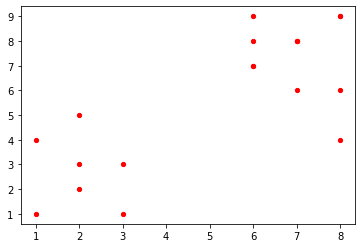

In [2]:
df = pd.read_csv('kmeans.csv')
plt.scatter(df['x'],df['y'], c='r', s=18)


[[1 2]
 [1 1]
 [2 6]]


Text(0, 0.5, 'y')

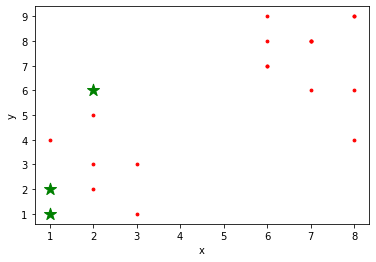

In [3]:
# Let k=3 centroids for now
k=3
# create matrix containing all points
X = np.array(list(zip(df['x'],df['y'])))
# generate k random points (centroids)
Cx = np.random.randint(np.min(X[:,0]),np.max(X[:,0]), size=k)
Cy = np.random.randint(np.min(X[:,1]),np.max(X[:,1]), size=k)

#represnt the k centroids as a matrix
C = np.array(list(zip(Cx, Cy)))
print(C)

# plt the original ponts as well as the k centroids
plt.scatter(df['x'],df['y'], c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel('x')
plt.ylabel('y')

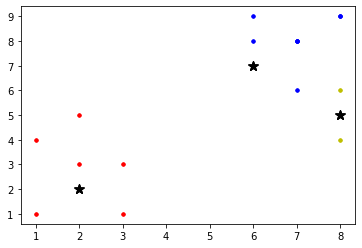

In [4]:
from copy import deepcopy

# calculate the distance between two points
def euclidean_distance(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

#create a matrix of 0 with the same dimension as C (centroids)
C_prev = np.zeros(C.shape)

#store the cluster each point belongs to
clusters =np.zeros(len(X))

# C is the random centroids and C_prev is all 0s
distance_differences = euclidean_distance(C, C_prev)

# loop as long as there is still a difference in 
# distance between the previous and current centroids
while distance_differences.any() != 0:

#assign each value to its closest clsuter
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)
    
    # returns the indices of the minimum values along an axis
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
# store the prev centroids
    C_prev = deepcopy(C)
    
# find the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)
#find the distances between old centroids and new
    distance_differences = euclidean_distance(C, C_prev)

# plot the scatter plot
colors = ['b','r','y','g','c','m']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j]==i])
    if len(points) > 0:
        plt.scatter(points[:,0], points[:,1], s=10, c=colors[i])
    else:
        print('Please regenerate your centroids again.')
    plt.scatter(points[:,0], points[:,1], s=10, c=colors[i])
    plt.scatter(C[:,0], C[:,1], marker='*', s=100, c='black')


In [5]:
for i, cluster in enumerate(clusters):
    print("Point " + str(X[i]),
          "Cluster " + str(int(cluster)))

Point [1 1] Cluster 1
Point [2 2] Cluster 1
Point [2 3] Cluster 1
Point [1 4] Cluster 1
Point [3 3] Cluster 1
Point [6 7] Cluster 0
Point [7 8] Cluster 0
Point [6 8] Cluster 0
Point [7 6] Cluster 0
Point [6 9] Cluster 0
Point [2 5] Cluster 1
Point [7 8] Cluster 0
Point [8 9] Cluster 0
Point [6 7] Cluster 0
Point [7 8] Cluster 0
Point [3 1] Cluster 1
Point [8 4] Cluster 2
Point [8 6] Cluster 2
Point [8 9] Cluster 0


In [6]:
print(C)

[[6 7]
 [2 2]
 [8 5]]


# K Means in Sklearn

In [5]:
# using K-Means in scikit-learn
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k)

In [6]:
kmeans = kmeans.fit(X)

In [7]:
labels = kmeans.predict(X)

In [10]:
centroids = kmeans.cluster_centers_

In [11]:
print(labels)
print(centroids)

[1 1 1 1 1 0 0 0 2 0 1 0 0 0 0 1 2 2 0]
[[6.77777778 8.11111111]
 [2.         2.71428571]
 [7.66666667 5.33333333]]


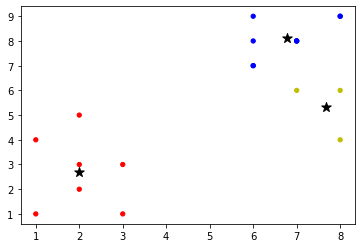

In [12]:
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]

plt.scatter(df['x'],df['y'], c=colors, s=18)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

In [13]:
# making predictions
cluster = kmeans.predict([[3,4]])[0]
print(c[cluster])

cluster=kmeans.predict([[7,5]])[0]
print(c[cluster])

cluster = kmeans.predict([[5,5]])[0]
print(c[cluster])

r
y
y


In [14]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print(silhouette_samples)

print("Average of Silhoette Coefficients for k =", k)
print("===========================================")
print("Silhoette mean:", silhouette_samples.mean())


[0.67534567 0.73722797 0.73455072 0.66254937 0.6323039  0.33332111
 0.63792468 0.58821402 0.29141777 0.59137721 0.50802377 0.63792468
 0.52511161 0.33332111 0.63792468 0.60168807 0.51664787 0.42831295
 0.52511161]
Average of Silhoette Coefficients for k = 3
Silhoette mean: 0.5578051985195768


In [15]:
print("Silhouette mean:", metrics.silhouette_score(X, kmeans.labels_))


Silhouette mean: 0.5578051985195768


Silhouette Coefficients for k = 2 is 0.5578051985195768
Silhouette Coefficients for k = 3 is 0.5578051985195768
Silhouette Coefficients for k = 4 is 0.5578051985195768
Silhouette Coefficients for k = 5 is 0.5578051985195768
Silhouette Coefficients for k = 6 is 0.5578051985195768
Silhouette Coefficients for k = 7 is 0.5578051985195768
Silhouette Coefficients for k = 8 is 0.5578051985195768
Silhouette Coefficients for k = 9 is 0.5578051985195768
Silhouette Coefficients for k = 10 is 0.5578051985195768
Silhouette Coefficients for k = 11 is 0.5578051985195768
Silhouette Coefficients for k = 12 is 0.5578051985195768
Silhouette Coefficients for k = 13 is 0.5578051985195768
Silhouette Coefficients for k = 14 is 0.5578051985195768
Silhouette Coefficients for k = 15 is 0.5578051985195768
Silhouette Coefficients for k = 16 is 0.5578051985195768


<ipython-input-8-15949ac59759>:8: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)
<ipython-input-8-15949ac59759>:8: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)


Silhouette Coefficients for k = 17 is 0.5578051985195768


<ipython-input-8-15949ac59759>:8: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)


Silhouette Coefficients for k = 18 is 0.5578051985195768
Optimal K is  2


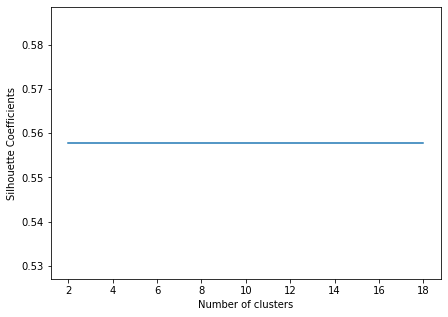

In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics
silhouette_avgs = []
min_k = 2

# try k from 2 to max number of labels
for k in range(min_k, len(X)):
    kmean = KMeans(n_clusters=k).fit(X)
    score=metrics.silhouette_score(X, kmeans.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

f, ax = plt.subplots(figsize=(7,5))
ax.plot(range(min_k, len(X)), silhouette_avgs)

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")

# optimal k is the one with the highest average silhouette
Optimal_K = silhouette_avgs.index(max(silhouette_avgs))+  min_k
print("Optimal K is ", Optimal_K)

## Using K-Means to solve real-life problems

In [9]:
df = pd.read_csv("BMX_G.csv")
print(df.shape)

(9338, 27)


In [10]:
# Cleaning the data
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [11]:
df = df.dropna(subset=['bmxleg','bmxwaist'])
print(df.shape)

(6899, 27)


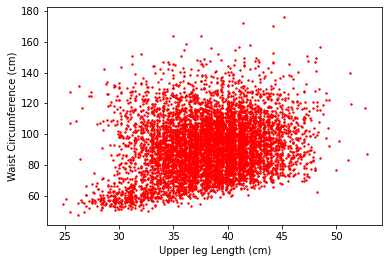

In [13]:
plt.scatter(df['bmxleg'],df['bmxwaist'], c='r', s=2)
plt.xlabel('Upper leg Length (cm)')
plt.ylabel('Waist Circumference (cm)');

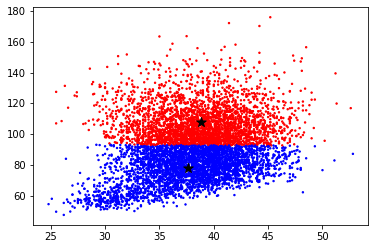

In [14]:
# clustering using K-Means

k=2
X=np.array(list(zip(df['bmxleg'], df['bmxwaist'])))

kmeans=KMeans(n_clusters=k)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_

#map label to colors
c=['b','r','y','g','c','m']
colors=[c[i] for i in labels]

plt.scatter(df['bmxleg'], df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

In [15]:
print(centroids)

[[ 37.65653117  77.88428184]
 [ 38.8224369  107.96612652]]


In [16]:
# finding the optimal size classes
from sklearn import metrics
silhouette_avgs =[]
min_k = 2

# try k from 2 to max 
for k in range(min_k, 10):
    kmean=KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

Optimal_K = silhouette_avgs.index(max(silhouette_avgs))+min_k
print("Optimal K is", Optimal_K)

Silhouette Coefficients for k = 2 is 0.5167267621574649
Silhouette Coefficients for k = 3 is 0.4725874765765924
Silhouette Coefficients for k = 4 is 0.4361494595971804
Silhouette Coefficients for k = 5 is 0.41912090803699137
Silhouette Coefficients for k = 6 is 0.3928621845767074
Silhouette Coefficients for k = 7 is 0.3785535943444761
Silhouette Coefficients for k = 8 is 0.35810176922557196
Silhouette Coefficients for k = 9 is 0.34121186128222897
Optimal K is 2


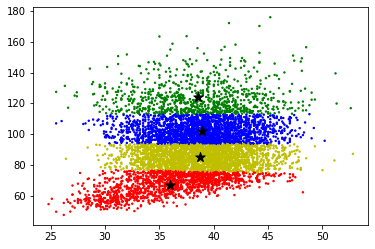

In [18]:
# company wants you to do 4 sides of bermuda shorts:
k=4
X=np.array(list(zip(df['bmxleg'], df['bmxwaist'])))

kmeans=KMeans(n_clusters=k)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_

#map label to colors
c=['b','r','y','g','c','m']
colors=[c[i] for i in labels]

plt.scatter(df['bmxleg'], df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black');

In [19]:
print(centroids)

[[ 38.89326494 102.16088314]
 [ 36.0113986   67.18587413]
 [ 38.72222696  84.96279863]
 [ 38.58878822 124.10305776]]
